# Q3. Find and plot the decision boundary between class ω1 and ω2.
## Assume P(ω1) = P(ω2).
## ω1= \[2,6; 3,4; 3,8; 4,6\]
## ω2= \[3,0; 1,-2; 3,-4; 5,-2\]

In [3]:

w1 = [[2,6],[3,4],[3,8],[4,6]]

w2 = [[3,0],[1,-2],[3,-4],[5,-2]]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
w1=pd.DataFrame(data=w1,columns=['x','y'])
w2=pd.DataFrame(data=w2,columns=['x','y'])

#converting to pandas dataframe for ease of access and plotting

Class w1 
    x  y
0  2  6
1  3  4
2  3  8
3  4  6


Class w2 
    x  y
0  3  0
1  1 -2
2  3 -4
3  5 -2




Text(0.5, 1.0, '2 classes ')

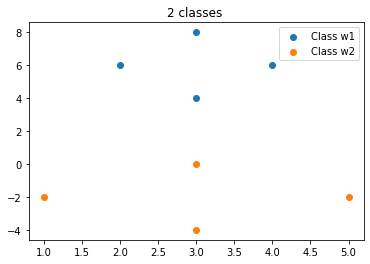

In [6]:
print("Class w1 \n",w1)
print("\n")
print("Class w2 \n",w2)
print("\n")

plt.scatter(x=w1['x'],y=w1['y'],label="Class w1")
plt.scatter(x=w2['x'],y=w2['y'],label="Class w2")
plt.legend()
plt.title("2 classes ")

## Calculate mean and covariance 

In [7]:
#mean
w1_mean=w1.mean().to_numpy()
w2_mean=w2.mean().to_numpy()

print(w1_mean)
print(w2_mean)

[3. 6.]
[ 3. -2.]


In [8]:
#covariance

w1_cov=w1.cov().to_numpy()
w2_cov=w2.cov().to_numpy()

print(w1_cov)
print(w2_cov)

[[0.66666667 0.        ]
 [0.         2.66666667]]
[[2.66666667 0.        ]
 [0.         2.66666667]]


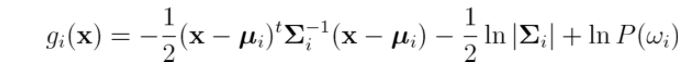

In [9]:
def gi(x,mean,cov,p_w):
  t1=-0.5 *(np.subtract(x,mean)).T @ np.linalg.inv(cov) @ np.subtract(x,mean)
  t2=-0.5 *np.log(np.linalg.det(cov))
  t3=np.log(p_w)
  return t1+t2+t3
 

In [12]:
from sympy import Matrix, solve, symbols

In [13]:
x,y=symbols('x y')

In [15]:
M=Matrix([x,y])
M

Matrix([
[x],
[y]])

In [26]:
g1=gi(M,w1_mean.reshape(2,1),w1_cov,0.5)
g2=gi(M,w2_mean.reshape(2,1),w2_cov,0.5)
# print("g1 = ",g1)
# print("g2 = ",g2)

In [27]:
g=np.subtract(g1[0][0],g2[0][0])
g

-(0.5625 - 0.1875*x)*(x - 3.0) + (1.125 - 0.1875*y)*(y - 6.0) + (2.25 - 0.75*x)*(x - 3.0) - (-0.1875*y - 0.375)*(y + 2.0) + 0.693147180559945

In [28]:
soln=solve(g,(x,y))
soln

[(x, 0.1875*x**2 - 1.125*x + 3.45645093981335)]

In [38]:
y =(0.1875*x**2 )- 1.125*x + 3.45645093981335
fn_values = []
for i in values:
    fn_values.append(y.subs(x,i))
    
fn_values

[13.7689509398134,
 10.9564509398134,
 8.51895093981335,
 6.45645093981335,
 4.76895093981335,
 3.45645093981335,
 2.51895093981335,
 1.95645093981335,
 1.76895093981335,
 1.95645093981335,
 2.51895093981335,
 3.45645093981335,
 4.76895093981335,
 6.45645093981335,
 8.51895093981335]

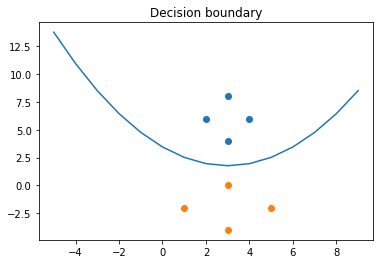

In [43]:
values=np.arange(-5,10,1)
plt.plot(values,fn_values)
plt.scatter(x=w1['x'],y=w1['y'])
plt.scatter(x=w2['x'],y=w2['y'])
plt.title("Decision boundary")
plt.show()